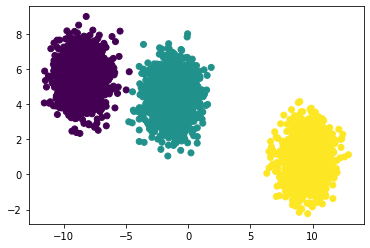

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

x,y = make_blobs(n_samples = 5000, n_features = 2,centers = 3,random_state = 7)
plt.scatter(x[:,0],x[:,1],c =y)

# K-means
# The Algorithm
- First, identify how many clusters you want $k$
- Randomly choose $k$ centroids $C = \{c_1, c_2, \dots, c_k\}$ from the data points $X = \{x_1, x_2, \dots, x_n\} \in \mathbb{R}^D $.
- For each data point $x_i$, find the nearest centroid $c_j$ as its corresponding cluster using sum of squared distance $ D(x_i, c_j) = \displaystyle\sum_{i=1}^{n}{\| x_i - c_j \|^2}$.
- For each cluster, update its centroid by computing means value along the dimension of data points in the cluster.
- Compute the displacement between the old and the new centroids and repeat steps 2 and 3 if the displacement is less than a threshold (converged).

In [48]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3).fit(x)

In [49]:
## we use the data we generated to create 3 clusters

In [50]:
print(kmeans_model.cluster_centers_)#### the output order is the label order,0,1,2

[[ 9.54875953  0.80417476]
 [-1.22580096  4.43342341]
 [-8.47968768  5.5562698 ]]


In [51]:
#### predict the clusters of data
print(kmeans_model.predict(x))

[2 1 1 ... 2 1 1]


In [52]:
KMeans(n_clusters = 3).fit_predict(x)### Convenience method; equivalent to calling fit(X) followed by predict(X

array([1, 2, 2, ..., 1, 2, 2], dtype=int32)

In [53]:
kmeans_model = KMeans(n_clusters = 3,verbose = True).fit(x)
### run 10 times , get a perfet cluster paramater for you based on lowest inertia ,because the start point is different
### inertia measure of distance 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9837.760228969451
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 0.000000e+00 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9839.246367169379
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 8.845015e-03 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9839.246367169379
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 8.845015e-03 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9879.11533676427
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 2.345021e-02 within tolerance 3.046576e-03
Initialization co

In [54]:
kmeans_model.score(x)##Opposite of the inertia, the closer the better

-9837.76022896944

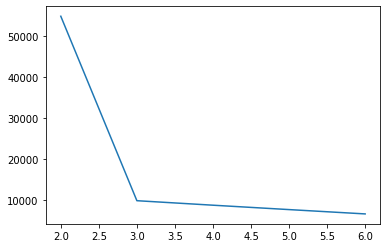

In [55]:
range_n_clusters = [2,3,4,5,6]
score_kmeans = []
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster)
    y_pred = kmeans.fit_predict(x)
    score_kmeans.append(-kmeans.score(x))
plt.plot(range_n_clusters,score_kmeans)

In [56]:
### k = 3 is what we need to choose, if we want to know the best custers we need to plot that.

# Measuring Cluster Quality to Determine the Number of Clusters
### Unsupervised
- 1- Elbow Method
- 2- Silhouette Analysis

s [0.76976232 0.66222429 0.69723105 ... 0.77282582 0.62733114 0.46093979] s_mean 0.7423436600516422
s [0.75839038 0.77526616 0.6801004  ... 0.79937009 0.81477066 0.78316477] s_mean 0.7880526216237652
s [0.75839038 0.77526616 0.6801004  ... 0.79937009 0.81477066 0.78316477] s_mean 0.6117165035557788
s [0.72976511 0.09730205 0.4203785  ... 0.77768712 0.29898881 0.48986493] s_mean 0.4513674029027843
s [-0.01503715  0.18509874  0.2626154  ...  0.1425152   0.37335192
  0.39266285] s_mean 0.30966220112123094


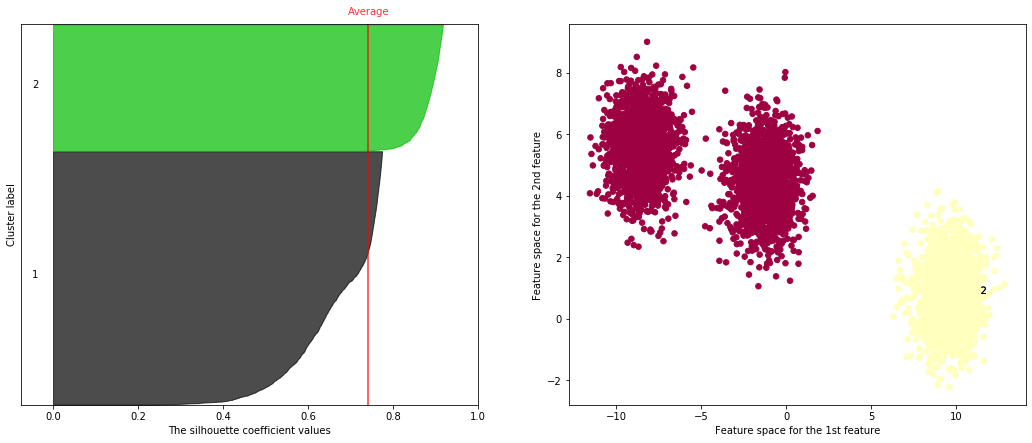

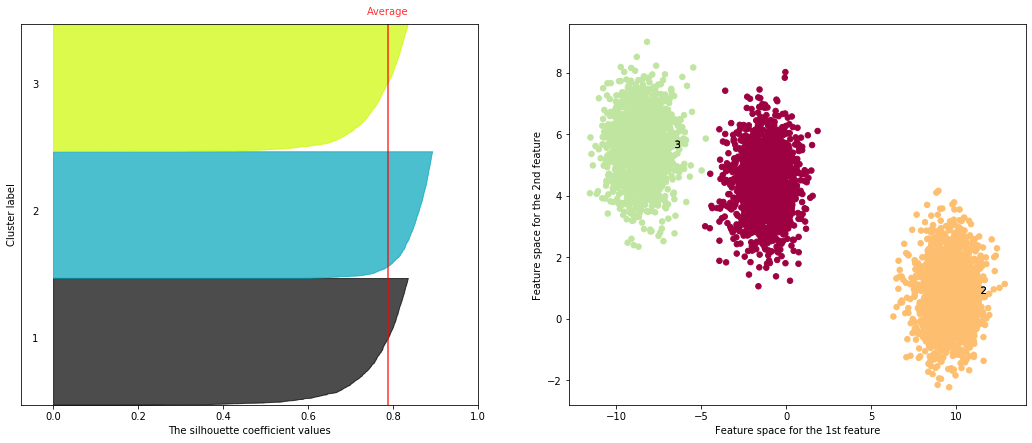

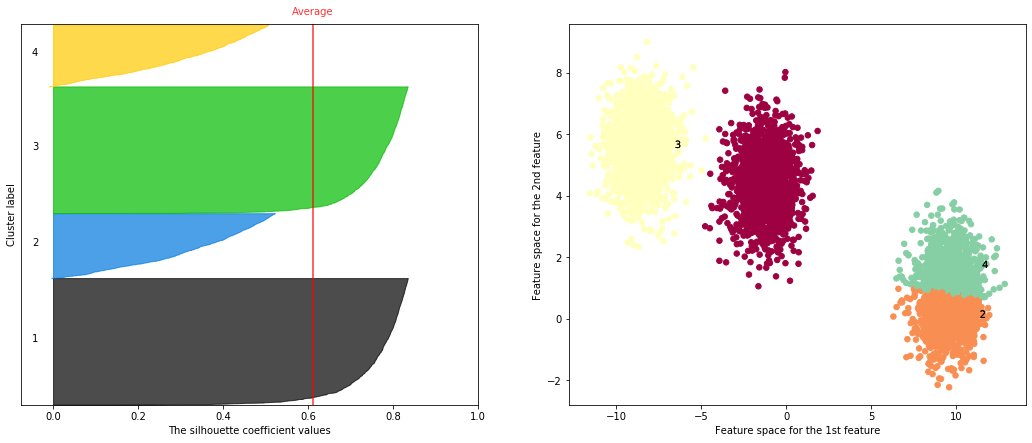

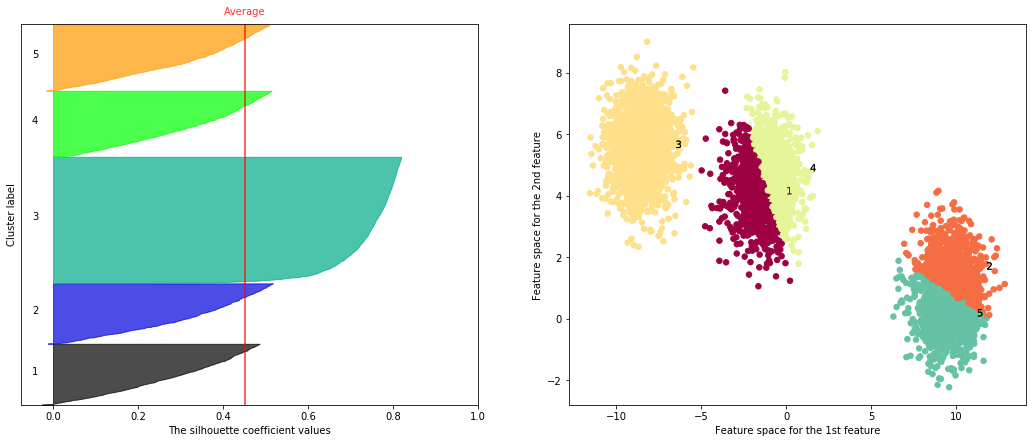

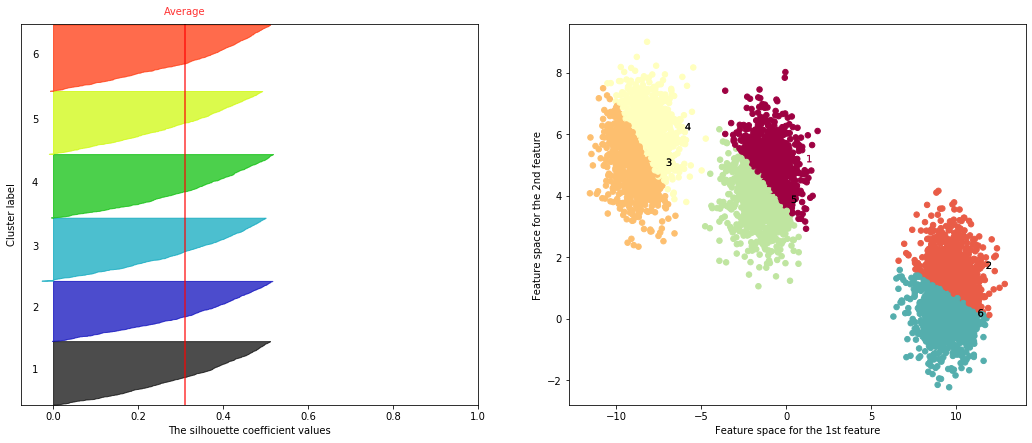

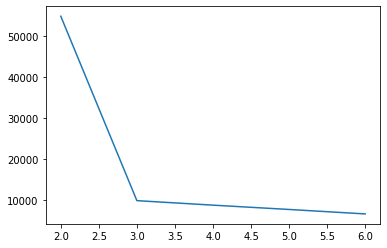

In [57]:
# from kmeansplots import kmeans_plot, silhouette_plot, we create the kmean_plots library
from kmean_plots import kmeans_plot, silhouette_plot 
from sklearn import metrics # for evaluations
# List of number of clusters
range_n_clusters = [2, 3, 4, 5, 6]
score_kmeans = []

# For each number of clusters, perform Silhouette analysis and visualize the results.
for n_clusters in range_n_clusters:
    
    
    # Perform k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(x)
    score_kmeans.append(-kmeans.score(x))
    
    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(x, y_pred)
    
    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(x, y_pred)
    
    print('s', s, 's_mean', s_mean)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
    ax1 = silhouette_plot(x, y_pred, n_clusters=n_clusters, ax=ax1)
    ax2 = kmeans_plot(x, y_pred, kmeans.cluster_centers_, ax=ax2)
    
plt.figure()
plt.plot(range_n_clusters, score_kmeans)

we choose the graph which os cut by the line not too high and not too low.

# Kmeans Limitations
Kmeans does not handle clusters very well and it can not deal with spiral/circular type data

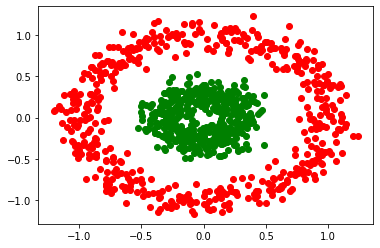

In [58]:
from sklearn.datasets import make_circles 
x, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ro')
plt.plot(x[y == 1, 0], x[y == 1, 1], 'go')

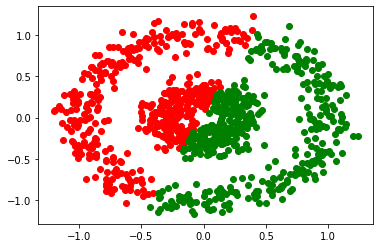

In [59]:
# Run k-means on non-spherical data.
X = x
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# DBSCAN

# DBSCAN: Density-Based Spatial Clustering of Applications with Noise
### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.
### Terms
- The Eps-neighborhood of a point $q$－$N_{Eps}$: A point $p \in N_{Eps}(q)$ if $D(p,q) \leq Eps$. (Point inside the circle).
- Outlier: Not in a cluster.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (dense neighborhood).
- Border point: In cluster but neighborhood is not dense.

### The Algorithm
- Randomly choose a point $p$.
- Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
- If $p$ is a core point, a cluster is formed.
- If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
- Repeat the process until all the data points have been processed.


# with DBSCAN we can use eps and min_samples to control our model and to detect outliers

advantage: can discover arbitrarily shaped clusters, find cluster completely surroundedby different clusters,robust towards outlier detection(noise)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = 5000,n_features=2,centers = 3,random_state = 7)

In [61]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
y_pred = DBSCAN(eps = 0.1,min_samples = 30).fit_predict(x_scaled)### we can change eps and min_samples

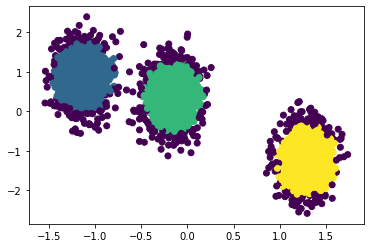

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_scaled[:,0],x_scaled[:,1],c= y_pred)

In [63]:
set(y_pred)

{-1, 0, 1, 2}

In [81]:
import numpy as np
np.unique(y_pred)### -1 indicate the outlier GROUP

array([-1,  0])

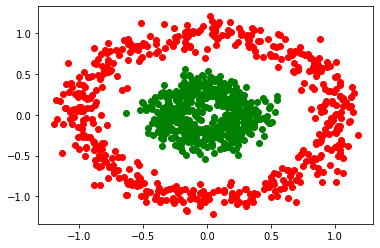

In [66]:
from sklearn.datasets import make_circles 
x, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ro')
plt.plot(x[y == 1, 0], x[y == 1, 1], 'go')

In [75]:
x_scaled = StandardScaler().fit_transform(x)
y_pred = DBSCAN(eps = 0.3,min_samples = 30).fit_predict(x_scaled)### we can change eps and min_samples

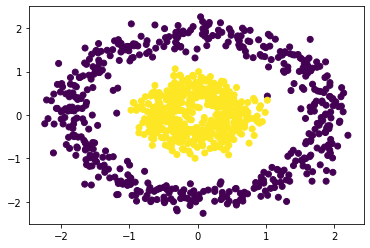

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_scaled[:,0],x_scaled[:,1],c= y_pred)

In [77]:
set(y_pred)

{-1, 0}

In [83]:
## homogenity indicate how many samples belong to the cluster.e.g.In one cluster,there are several groups with different labels, 
##birds,cats,dogs that means homogenity is less one

In [78]:
from sklearn.metrics import homogeneity_score,completeness_score
homogeneity_score(labels_true=y,labels_pred = y_pred)

0.981177278247756

In [84]:
## completeness indicate in one group if allt the labels are true lable, the completeness is 1.

In [79]:
completeness_score(labels_true=y,labels_pred = y_pred)

0.9811886027254056

In [86]:
print(homogeneity_score(labels_pred = y_pred,labels_true=y))
print(completeness_score(labels_pred = y_pred,labels_true=y))

0.981177278247756
0.9811886027254056
